# K-fold validation test with 80/20 models

In [1]:
import pandas
import sklearn
import scipy
from sklearn import model_selection, linear_model, preprocessing, metrics, ensemble
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from scipy import cluster
from scipy.cluster import hierarchy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
rxns_df_x = pandas.read_csv("godineau2023_reactions_OHE1.csv")
rxns_df_x = rxns_df_x.drop('Unnamed: 0', axis=1)
rxns_df_x = rxns_df_x.drop('Round', axis=1)
rxns_df_y = pandas.read_csv("godineau2023_yields_OHE.csv")
rxns_df_y = rxns_df_y.drop('Unnamed: 0', axis=1)

In [12]:
model = RandomForestRegressor(random_state=42)

cv = model_selection.KFold(n_splits=5, shuffle=True)

for train_index, test_index in cv.split(rxns_df_x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = rxns_df_x.iloc[train_index], rxns_df_x.iloc[test_index]
    y_train, y_test = rxns_df_y.iloc[train_index], rxns_df_y.iloc[test_index]

    # For training, fit() is used
    model.fit(X_train, y_train)
 
    # For other metrics, we need the predictions of the model
    y_pred = model.predict(X_test)

    print(metrics.mean_squared_error(y_test, y_pred))
    print(metrics.r2_score(y_test, y_pred))

TRAIN: [  0   2   3   5   6   7  10  11  12  14  15  16  17  18  21  23  24  25
  26  27  28  29  30  31  32  33  34  35  36  38  39  40  41  43  44  45
  46  48  49  50  51  54  55  56  57  58  60  61  62  63  65  66  67  68
  69  72  73  74  76  77  79  80  81  82  83  84  87  89  90  91  92  93
  94  96  97  98  99 100 101 103 104 105 106 107 108 110 111 112 113 114
 116 117 118 119 120 121 122 123 124 125 126 127 129 130 132 133 134 135
 137 138 139 140 142 143 144 145 146 148 149 150 151 152 153 154 155 157
 158 159 160 162 165 166 167 168 170 171 172 173 175 176 177 180 181 183
 184 185 186 187 188 189 190 191 192 193 194 195 197 198 199 200 201 202
 203 204 206 207 208 209 211 212 213 214 215 216 218 219 220 223 224 225
 227 229 230 231 232 234 235 236 237 238 239 241 242 243 244 246 247 248
 249 250 251 252 253 254 256 257 258 260 261 262 263] TEST: [  1   4   8   9  13  19  20  22  37  42  47  52  53  59  64  70  71  75
  78  85  86  88  95 102 109 115 128 131 136 141 147 156 

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


217.5122132375473
0.3767350757776059
TRAIN: [  1   2   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  26  27  28  29  30  31  32  33  34  36  37  38  40  42  43
  44  45  47  48  49  50  51  52  53  56  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  77  78  79  80  82  83  84  85  86
  87  88  89  90  91  93  94  95  98  99 100 102 104 105 106 107 108 109
 110 112 114 115 117 118 119 122 125 127 128 129 130 131 132 133 134 135
 136 138 139 140 141 143 144 145 146 147 148 151 152 154 155 156 158 159
 160 161 162 163 164 166 167 169 170 172 173 174 178 179 180 182 183 184
 185 186 187 188 189 190 192 193 194 195 196 197 198 200 201 202 203 204
 205 206 209 210 211 213 214 215 216 217 218 220 221 222 223 224 226 227
 228 230 231 232 233 234 235 236 237 238 239 240 242 243 245 246 248 249
 251 252 253 254 255 256 257 258 259 260 261 262 263] TEST: [  0   3  23  24  25  35  39  41  46  54  55  66  68  76  81  92  96  97
 101 103 111 113 116

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


112.37495160320759
0.7820261050247431
TRAIN: [  0   1   3   4   5   6   7   8   9  10  12  13  15  16  17  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  52  53  54  55  56  57  59
  60  62  64  65  66  68  69  70  71  72  74  75  76  78  79  80  81  83
  84  85  86  87  88  90  91  92  94  95  96  97  99 101 102 103 104 106
 109 111 113 114 115 116 117 119 120 121 123 124 126 127 128 130 131 132
 133 134 136 137 139 140 141 142 144 146 147 148 149 150 151 152 153 154
 155 156 157 160 161 163 164 165 166 168 169 171 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 191 192 193 194 196 197 198 199
 200 201 202 203 205 206 207 208 210 211 212 213 216 217 219 220 221 222
 223 224 225 226 227 228 229 231 232 233 234 235 236 237 238 239 240 241
 243 244 245 246 247 248 249 250 251 254 255 259 262] TEST: [  2  11  14  18  51  58  61  63  67  73  77  82  89  93  98 100 105 107
 108 110 112 118 12

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


424.3170788024528
0.27244938734447455
TRAIN: [  0   1   2   3   4   8   9  10  11  13  14  16  17  18  19  20  21  22
  23  24  25  26  27  28  31  32  34  35  37  38  39  40  41  42  45  46
  47  51  52  53  54  55  58  59  60  61  62  63  64  66  67  68  69  70
  71  72  73  75  76  77  78  79  81  82  85  86  87  88  89  90  92  93
  94  95  96  97  98  99 100 101 102 103 105 107 108 109 110 111 112 113
 114 115 116 118 119 120 121 122 123 124 125 126 128 129 131 132 134 135
 136 137 138 140 141 142 143 145 147 149 150 151 152 153 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 181 182 184 187 189 190 191 193 195 196 197 199 200 201 202
 204 205 206 207 208 209 210 211 212 214 215 217 218 219 220 221 222 224
 225 226 227 228 229 230 231 232 233 235 237 240 241 242 243 244 245 247
 248 250 251 252 253 255 256 257 258 259 260 261 263] TEST: [  5   6   7  12  15  29  30  33  36  43  44  48  49  50  56  57  65  74
  80  83  84  91 10

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


170.85461171169797
0.5823641598394604
TRAIN: [  0   1   2   3   4   5   6   7   8   9  11  12  13  14  15  18  19  20
  22  23  24  25  29  30  33  35  36  37  39  41  42  43  44  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  61  63  64  65  66  67  68
  70  71  73  74  75  76  77  78  80  81  82  83  84  85  86  88  89  91
  92  93  95  96  97  98 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 115 116 117 118 120 121 122 123 124 125 126 127 128 129 130 131
 133 135 136 137 138 139 141 142 143 144 145 146 147 148 149 150 153 154
 156 157 158 159 161 162 163 164 165 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 185 186 188 190 191 192 194 195 196 198
 199 203 204 205 207 208 209 210 212 213 214 215 216 217 218 219 221 222
 223 225 226 228 229 230 233 234 236 238 239 240 241 242 244 245 246 247
 249 250 252 253 254 255 256 257 258 259 260 261 262 263] TEST: [ 10  16  17  21  26  27  28  31  32  34  38  40  45  60  62  69  72  79
  87  90  94  9

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


194.9252457515384
0.5790554263979149


In [13]:
model = RandomForestRegressor(random_state=42)

cv = model_selection.KFold(n_splits=5, shuffle=True)

for train_index, test_index in cv.split(rxns_df_x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = rxns_df_x.iloc[train_index], rxns_df_x.iloc[test_index]
    y_train, y_test = rxns_df_y.iloc[train_index], rxns_df_y.iloc[test_index]

    # For training, fit() is used
    model.fit(X_train, y_train)
 
    # For other metrics, we need the predictions of the model
    y_pred = model.predict(X_test)

    print(metrics.mean_squared_error(y_test, y_pred))
    print(metrics.r2_score(y_test, y_pred))

TRAIN: [  0   1   2   3   6   7   8   9  10  11  12  13  14  15  16  19  20  21
  22  23  24  25  26  27  28  29  31  32  33  34  36  37  38  39  40  41
  42  43  44  45  46  48  49  52  53  54  55  56  57  58  59  60  61  62
  63  66  69  70  72  73  74  76  77  78  80  81  82  84  85  86  89  91
  92  93  94  95  96  97  98  99 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 121 123 124 125 126 127 128 131 132
 133 134 135 137 138 139 140 141 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 162 163 164 166 167 168 170 172 173 175 176 178
 179 180 181 182 183 184 185 186 188 190 191 192 193 194 195 196 198 199
 200 201 203 204 205 208 209 210 212 213 214 215 216 218 219 220 221 222
 223 224 226 227 228 229 230 231 232 236 237 238 239 240 241 242 244 245
 246 248 249 250 251 252 254 256 257 259 260 261 262] TEST: [  4   5  17  18  30  35  47  50  51  64  65  67  68  71  75  79  83  87
  88  90 100 120 122 129 130 136 142 143 160 161 165 169 

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


253.40231333698114
0.52329369050765
TRAIN: [  1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18  19
  20  21  25  26  28  29  30  31  32  33  34  35  37  38  41  42  43  46
  47  48  49  50  51  52  54  56  58  59  60  61  62  64  65  66  67  68
  69  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  90  93  94  97  98  99 100 103 104 105 106 108 109 110 112 113 114
 117 120 121 122 124 126 127 128 129 130 133 134 135 136 137 139 141 142
 143 145 146 147 148 149 150 151 152 154 155 156 157 159 160 161 162 163
 164 165 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 184
 185 186 187 188 189 191 192 194 195 196 197 198 199 200 202 203 204 206
 207 208 209 210 211 213 215 217 219 220 221 224 225 226 227 228 229 230
 231 232 233 234 235 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 258 259 260 261 262 263] TEST: [  0  14  22  23  24  27  36  39  40  44  45  53  55  57  63  70  89  91
  92  95  96 101 102 

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


135.23679886698113
0.6718273745455681
TRAIN: [  0   1   2   3   4   5   7  10  11  12  13  14  15  16  17  18  20  21
  22  23  24  25  26  27  29  30  32  33  35  36  37  38  39  40  41  42
  43  44  45  47  50  51  53  54  55  56  57  60  61  63  64  65  66  67
  68  70  71  74  75  76  77  79  80  81  83  84  85  87  88  89  90  91
  92  93  95  96  97  98  99 100 101 102 103 107 108 109 110 111 112 113
 115 116 117 118 119 120 121 122 123 124 125 127 129 130 131 132 133 134
 135 136 137 138 139 140 142 143 144 145 146 147 149 150 153 155 156 157
 158 159 160 161 164 165 166 167 169 171 172 173 174 175 177 179 180 181
 183 185 186 187 188 189 190 191 192 193 194 195 196 197 198 200 201 202
 205 206 207 208 209 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 251 252 253 255 257 258 260 261 262 263] TEST: [  6   8   9  19  28  31  34  46  48  49  52  58  59  62  69  72  73  78
  82  86  94 104 10

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


257.10875286471696
0.4182066383321763
TRAIN: [  0   2   3   4   5   6   8   9  12  13  14  17  18  19  20  22  23  24
  26  27  28  30  31  32  33  34  35  36  38  39  40  42  44  45  46  47
  48  49  50  51  52  53  55  56  57  58  59  60  61  62  63  64  65  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  94  95  96  98  99 100 101 102 103 104 105
 106 107 109 110 111 113 114 115 116 118 119 120 121 122 123 125 126 127
 128 129 130 131 132 134 135 136 137 138 140 141 142 143 144 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 165 166 167 168 169
 170 171 173 174 176 177 178 182 183 184 187 189 190 191 192 193 195 196
 197 199 201 202 203 204 205 206 207 208 209 210 211 212 214 216 217 218
 219 222 223 225 227 228 229 230 231 232 233 234 235 236 239 242 243 244
 247 250 253 254 255 256 257 258 259 260 261 262 263] TEST: [  1   7  10  11  15  16  21  25  29  37  41  43  54  66  93  97 108 112
 117 124 133 139 14

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


204.08244972660395
0.6363855064485748
TRAIN: [  0   1   4   5   6   7   8   9  10  11  14  15  16  17  18  19  21  22
  23  24  25  27  28  29  30  31  34  35  36  37  39  40  41  43  44  45
  46  47  48  49  50  51  52  53  54  55  57  58  59  62  63  64  65  66
  67  68  69  70  71  72  73  75  78  79  82  83  86  87  88  89  90  91
  92  93  94  95  96  97 100 101 102 104 105 106 107 108 111 112 114 115
 116 117 118 119 120 122 123 124 125 126 128 129 130 131 132 133 136 138
 139 140 141 142 143 144 145 146 147 148 151 152 153 154 158 160 161 162
 163 164 165 166 167 168 169 170 171 172 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 193 194 197 198 199 200 201 202 203
 204 205 206 207 210 211 212 213 214 215 216 217 218 220 221 222 223 224
 225 226 227 228 229 230 231 233 234 235 236 237 238 240 241 243 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 263] TEST: [  2   3  12  13  20  26  32  33  38  42  56  60  61  74  76  77  80  81
  84  85  98  9

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


168.41067082942303
0.5875106430258539


In [14]:
model = RandomForestRegressor(random_state=42)

cv = model_selection.KFold(n_splits=5, shuffle=True)

for train_index, test_index in cv.split(rxns_df_x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = rxns_df_x.iloc[train_index], rxns_df_x.iloc[test_index]
    y_train, y_test = rxns_df_y.iloc[train_index], rxns_df_y.iloc[test_index]

    # For training, fit() is used
    model.fit(X_train, y_train)
 
    # For other metrics, we need the predictions of the model
    y_pred = model.predict(X_test)

    print(metrics.mean_squared_error(y_test, y_pred))
    print(metrics.r2_score(y_test, y_pred))

TRAIN: [  0   1   2   3   4   5   7   8   9  10  12  14  15  16  17  18  19  20
  23  24  25  26  28  29  30  32  33  35  36  37  38  40  43  44  45  46
  47  48  49  51  52  54  56  57  58  59  60  61  62  63  64  66  67  69
  71  76  77  78  79  80  81  82  83  84  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 105 106 107 108 109 110 111 112
 114 115 117 118 119 120 121 123 124 125 126 127 129 130 132 133 134 135
 137 138 139 140 141 142 143 145 146 147 148 149 151 152 154 155 156 157
 158 159 160 162 163 164 165 167 169 171 172 173 174 175 179 180 181 182
 183 184 185 186 187 188 189 190 192 193 194 195 196 197 198 199 200 201
 202 204 205 206 207 208 209 210 212 213 216 217 219 220 222 223 224 225
 226 227 229 230 231 232 234 236 237 238 239 240 241 242 243 246 247 248
 249 250 251 252 254 256 257 258 259 260 261 262 263] TEST: [  6  11  13  21  22  27  31  34  39  41  42  50  53  55  65  68  70  72
  73  74  75  85 104 113 116 122 128 131 136 144 150 153 

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


152.18180325245285
0.6036654739436158
TRAIN: [  1   2   4   5   6   7   8   9  11  13  15  16  18  19  21  22  23  24
  25  26  27  28  29  31  32  33  34  35  36  37  38  39  40  41  42  43
  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  62  63
  64  65  66  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  89  90  91  93  94  95  96  97  98 101 103 104 105 106
 107 108 109 110 111 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 130 131 133 134 135 136 138 140 141 142 143 144 145 146 150
 153 154 156 157 159 161 163 166 168 169 170 171 174 175 176 177 178 179
 180 181 182 183 185 187 188 190 191 192 193 194 195 196 198 200 201 202
 203 204 206 207 208 209 210 211 214 215 216 217 218 220 221 222 224 225
 226 227 228 229 230 231 232 233 235 236 237 238 241 243 244 245 247 248
 249 250 251 252 253 254 255 256 257 259 260 261 263] TEST: [  0   3  10  12  14  17  20  30  44  61  67  87  88  92  99 100 102 112
 129 132 137 139 14

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


225.07894556471695
0.5460712642022261
TRAIN: [  0   1   2   3   6   7   9  10  11  12  13  14  17  18  19  20  21  22
  24  25  26  27  28  30  31  33  34  37  38  39  40  41  42  43  44  45
  47  48  50  51  53  54  55  58  60  61  63  64  65  66  67  68  69  70
  72  73  74  75  79  80  81  84  85  86  87  88  89  91  92  93  95  97
  99 100 102 103 104 105 106 107 109 111 112 113 114 115 116 117 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 135 136 137 138 139
 140 141 142 143 144 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 164 165 166 167 168 169 170 172 173 175 176 177 178 179
 180 182 183 184 185 186 188 189 191 192 193 195 197 198 199 200 201 202
 203 204 205 207 208 209 211 212 213 214 215 216 218 219 220 221 222 223
 224 225 226 227 228 231 233 234 235 237 238 239 240 241 242 244 245 246
 248 249 251 252 253 255 257 258 259 260 261 262 263] TEST: [  4   5   8  15  16  23  29  32  35  36  46  49  52  56  57  59  62  71
  76  77  78  82  8

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


263.6812001698113
0.463067793054629
TRAIN: [  0   3   4   5   6   7   8  10  11  12  13  14  15  16  17  18  20  21
  22  23  25  26  27  29  30  31  32  33  34  35  36  38  39  40  41  42
  44  46  49  50  52  53  55  56  57  59  60  61  62  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  82  83  84  85  86  87  88  90
  91  92  93  94  96  97  98  99 100 101 102 104 106 107 108 110 112 113
 116 117 118 119 120 121 122 124 125 127 128 129 130 131 132 134 136 137
 139 140 141 142 143 144 145 147 148 149 150 151 152 153 155 156 158 160
 161 162 163 164 165 166 167 168 170 171 172 173 174 175 176 177 178 181
 184 185 186 187 189 190 191 192 194 196 197 198 199 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 217 218 219 221 222 223 225 226
 228 229 230 231 232 233 234 235 236 239 240 241 242 243 244 245 246 247
 248 250 251 252 253 254 255 256 257 258 261 262 263] TEST: [  1   2   9  19  24  28  37  43  45  47  48  51  54  58  63  79  80  81
  89  95 103 105 109 

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


245.16168541698113
0.5630543342926195
TRAIN: [  0   1   2   3   4   5   6   8   9  10  11  12  13  14  15  16  17  19
  20  21  22  23  24  27  28  29  30  31  32  34  35  36  37  39  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  61
  62  63  65  67  68  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  85  87  88  89  90  92  94  95  96  98  99 100 101 102 103 104 105
 108 109 110 111 112 113 114 115 116 118 122 123 126 128 129 131 132 133
 134 135 136 137 138 139 144 145 146 147 148 149 150 151 152 153 154 155
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 176 177 178 179 180 181 182 183 184 186 187 188 189 190 191 193 194 195
 196 197 199 200 203 205 206 210 211 212 213 214 215 216 217 218 219 220
 221 223 224 227 228 229 230 232 233 234 235 236 237 238 239 240 242 243
 244 245 246 247 249 250 253 254 255 256 258 259 260 262] TEST: [  7  18  25  26  33  38  40  60  64  66  69  84  86  91  93  97 106 107
 117 119 120 12

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


162.9730778821154
0.6180540800537754


The randomization matters a lot ! We see a wide range of r2 accuracies here going from 0.24 to 0.78. Let's just pick the train/set separation that lead to the model with the best performance and see if we can improve it by separating the test set into a validation and a test set.

In [46]:
# we pick the best performing model
TRAIN= [  1,   2  , 4 ,  5 ,  6 ,  7 ,  8 ,  9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
  20  ,21,  22,  26,  27,  28,  29 , 30 , 31 , 32 , 33,  34,  36,  37,  38,  40,  42,  43,
  44,  45  ,47  ,48,  49,  50 , 51 , 52 , 53 , 56 , 57 , 58 , 59,  60,  61,  62,  63,  64,
  65,  67,  69,  70,  71,  72 , 73  ,74 , 75,  77,  78,  79,  80,  82,  83,  84,  85,  86,
  87,  88 , 89 , 90 , 91,  93,  94,  95,  98,  99, 100, 102, 104, 105, 106, 107, 108, 109,
 110, 112 ,114 ,115 ,117 ,118, 119, 122, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135,
 136, 138, 139 ,140, 141, 143, 144, 145, 146, 147, 148, 151, 152, 154, 155, 156, 158, 159,
 160 ,161 ,162, 163, 164, 166, 167 ,169 ,170 ,172, 173, 174, 178, 179, 180, 182, 183, 184,
 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202, 203, 204,
 205, 206, 209, 210, 211, 213, 214, 215, 216, 217, 218, 220, 221, 222, 223, 224, 226, 227,
 228, 230, 231, 232, 233, 234, 235, 236 ,237, 238, 239, 240, 242, 243, 245, 246, 248, 249,
 251, 252, 253, 254, 255, 256, 257 ,258, 259, 260, 261, 262, 263] 
TEMP= [  0,   3,  23,  24,  25,  35,  39,  41,  46,  54,  55,  66,  68 , 76 , 81 , 92 , 96 , 97,
 101, 103 ,111 ,113 ,116, 120, 121, 123, 124, 126 ,137, 142, 149, 150, 153, 157, 165, 168,
 171 ,175 ,176 ,177 ,181 ,191 ,199 ,207, 208, 212, 219, 225 ,229 ,241 ,244, 247, 250]
x_train = rxns_df_x.copy()
for j in range(0,264):
    if j not in TRAIN:
        x_train = x_train.drop([j], axis=0)

In [47]:
y_train = rxns_df_y.copy()
for j in range(0,264):
    if j not in TRAIN:
        y_train = y_train.drop([j], axis=0)
x_temp = rxns_df_x.copy()
for j in range(0,264):
    if j not in TEMP:
        x_temp = x_temp.drop([j], axis=0)
y_temp = rxns_df_y.copy()
for j in range(0,264):
    if j not in TEMP:
        y_temp = y_temp.drop([j], axis=0)

In [48]:
# this is the model we found as the best 80/20 with no validation
model = RandomForestRegressor(random_state = 42)
model.fit(x_train, y_train)
y_pred = model.predict(x_temp)
print('MSE =',metrics.mean_squared_error(y_temp, y_pred))
print('r2 =', metrics.r2_score(y_temp, y_pred))

C:\Users\Public.utilisateur\AppData\Local\Temp\ipykernel_9940\464465024.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


MSE = 112.37495160320759
r2 = 0.7820261050247431


In [6]:
# try the same with a validation set this time
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5,random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print('val RMSE =',np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
print('val MAE =',metrics.mean_absolute_error(y_val, y_pred))
print('val r2 =', metrics.r2_score(y_val, y_pred))

y_pred1 = model.predict(x_test)
print('test RMSE =',np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('test MAE =',metrics.mean_absolute_error(y_test, y_pred1))
print('test r2 =', metrics.r2_score(y_test, y_pred1))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


val RMSE = 7.107781982717686
val MAE = 5.273961538461543
val r2 = 0.8258030325465628
test RMSE = 13.112529705378918
test MAE = 9.450862962962965
test r2 = 0.7435999657836797


The model without a validation and test set separation performs better than the one with it ! We will keep the former with 80% train and 20% test without validation. 

# Using functions to explain SHAP values with natural language

## Looking at the format of the shap_values object and how to manipulate it

In [9]:
explainer = shap.Explainer(model, x_train)
shap_values = explainer(x_temp, check_additivity=False)
shap_values

.values =
array([[ 1.01465073, -0.69990833, -0.31232884, ..., -1.15684325,
         0.59944889,  0.26712196],
       [-0.25767638,  1.97128434, -0.47835879, ...,  0.21774913,
         0.64890182,  0.43254736],
       [-0.2191466 , -0.49046317, -0.08265327, ..., -1.17998777,
         0.08674059,  0.03685982],
       ...,
       [-0.0959282 , -0.16031469, -0.27971211, ...,  0.6031793 ,
         0.52536957,  0.34855183],
       [-0.25530676, -0.51878402,  0.91049419, ...,  0.65111951,
         0.66761203,  0.37661743],
       [-0.08229186, -0.21202404, -0.04005246, ..., -1.65595477,
         1.18923411,  0.72057332]])

.base_values =
array([21.986686, 21.986686, 21.986686, 21.986686, 21.986686, 21.986686,
       21.986686, 21.986686, 21.986686, 21.986686, 21.986686, 21.986686,
       21.986686, 21.986686, 21.986686, 21.986686, 21.986686, 21.986686,
       21.986686, 21.986686, 21.986686, 21.986686, 21.986686, 21.986686,
       21.986686, 21.986686, 21.986686, 21.986686, 21.986686, 21.9866

In [45]:
shap_values[0]

.values =
array([ 1.01465073e+00, -6.99908333e-01, -3.12328844e-01,  3.83836760e-03,
       -2.25490106e-03,  1.19405499e-03, -2.14931819e-01, -1.78070006e-01,
       -3.08035704e-01, -8.48784998e-03, -6.23646940e-02, -4.13415838e-02,
       -2.26017735e-01,  3.25747314e-02, -5.07910985e-01, -2.94817223e-03,
       -1.04002632e-01,  6.00250712e-02, -8.91628677e-02,  6.02596722e-01,
        1.96681568e-02, -5.67856511e+00, -1.63908428e+00, -2.55544325e-02,
       -1.08675564e-01, -1.19002836e-01, -1.82976725e+00, -2.92585731e-01,
       -1.53960787e-01,  1.83023059e-01,  3.42111650e-01, -2.13669899e-01,
       -2.54281166e+00, -3.66159728e+00, -1.73381762e+00, -1.81984817e-02,
       -1.99486399e-01, -1.84033008e-01, -1.28272015e+00, -1.15684325e+00,
        5.99448889e-01,  2.67121963e-01])

.base_values =
21.986686

.data =
array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1],
      dtype=int64)

Each experiment has 3 types of information in the shap_value object. They are separated as such:
- .values : a 1D array with the SHAP values of each feature pertaining to this prediction (SHAP values are determined locally !).
- .base_values : the value of the mean yield of this set. Note that this value is the same for every experiment of a given set.
- .data : a 1D array which is the input given to the model. In OHE format it shows the features that are present in the observed experiment. 

In [57]:
for i in range(0,len(shap_values[0])):
    print(f'{x_train.columns[i]} SHAP value = {shap_values.values[0][i]}')

Cu(OAc)2 SHAP value = 1.014650725827305
Cu2O SHAP value = -0.6999083329743371
CuBr SHAP value = -0.312328844011754
CuCl SHAP value = 0.0038383676041121363
CuI SHAP value = -0.002254901059277472
L1 SHAP value = 0.0011940549930295674
L10 SHAP value = -0.21493181932659355
L11 SHAP value = -0.17807000594650163
L12 SHAP value = -0.3080357044826087
L2 SHAP value = -0.00848784997855546
L3 SHAP value = -0.06236469398645568
L4 SHAP value = -0.041341583831817845
L5 SHAP value = -0.22601773470418265
L6 SHAP value = 0.03257473144243704
L7 SHAP value = -0.5079109846450955
L8 SHAP value = -0.0029481722303899005
L9 SHAP value = -0.10400263194402214
0.05 SHAP value = 0.060025071188574655
0.1 SHAP value = -0.08916286765283075
Cs2CO3 SHAP value = 0.6025967221277824
Et3N SHAP value = 0.019668156823609024
K2CO3 SHAP value = -5.67856510845013
K3PO4 SHAP value = -1.6390842777880608
KOH SHAP value = -0.025554432527715106
NaOAc SHAP value = -0.10867556428012903
NaOtBu SHAP value = -0.11900283596303779
TBAO SH

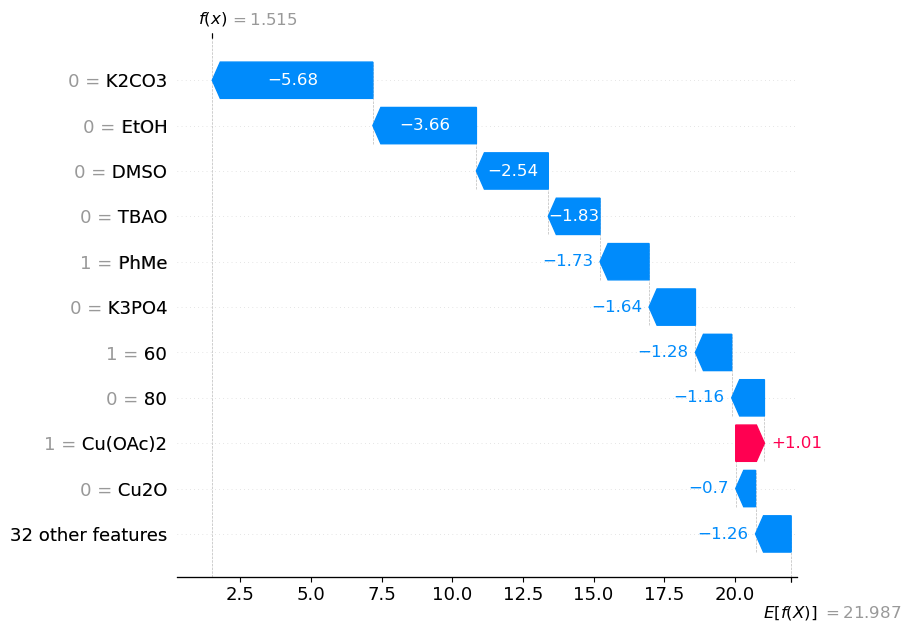

In [10]:
shap.plots.waterfall(shap_values[0], max_display=11)

Comparing the values in the plot to those given by the previous cell : as expected, they match. The plot has the advantage of automatically showing the values in order from the highest to the lowest but we can easily do the same with natural language.

## Writing functions !

In [8]:
def shap_value_effect(feature, nb):
    """
    returns the influence of the feature on the prediction of a specific data point
    feature = name of the feature we are looking at
    nb = index of the point
    """
    print(f'The SHAP value of {feature} for the experiment number {nb} was {shap_values.values[nb][x_train.columns.to_list().index(feature)]}.')
    if shap_values.values[nb][x_train.columns.to_list().index(feature)] > 0:
        if shap_values.data[nb][x_train.columns.to_list().index(feature)] == 1:
            print(f"The use of {feature} in this experiment made the yield higher than average.")
        else:
            print(f'The lack of {feature} in this experiment made the yield higher than average.')
    else:
        if shap_values.data[nb][x_train.columns.to_list().index(feature)] == 1:
            print(f"The use of {feature} in this experiment made the yield lower than average.")
        else:
            print(f'The lack of {feature} in this experiment made the yield lower than average.')
    #print(f'Average yield = {shap_values.base_values[nb]}')
    print(f'Predicted yield of this experiment = {y_pred[nb]}')
    print(f'Actual yield of this experiment = {y_temp["Yield of 3aa"][nb]}')


In [ ]:
shap_value_effect('K2CO3', 0)

The SHAP value of K2CO3 for the experiment number 0 was -5.67856510845013.
The lack of K2CO3 in this experiment made the yield lower than average.
Predicted yield of this experiment = 1.5147999999999993
Actual yield of this experiment = 0.0


In [11]:
shap_value_effect('EtOH', 0)

The SHAP value of EtOH for the experiment number 0 was -3.661597281426657.
The lack of EtOH in this experiment made the yield lower than average.
Predicted yield of this experiment = 1.5147999999999993
Actual yield of this experiment = 0.0


In [12]:
def shap_global(feature):
    """
    returns the global effect of a feature on the yield by analyzing its SHAP values
    """
    feature_shaps_pos = [shap_values.values[i][x_train.columns.to_list().index(feature)] for i in range(0,len(shap_values.values)) if shap_values.data[i][x_train.columns.to_list().index(feature)] == 1]
    feature_shaps_neg = [shap_values.values[i][x_train.columns.to_list().index(feature)] for i in range(0,len(shap_values.values)) if shap_values.data[i][x_train.columns.to_list().index(feature)] == 0]
    pos_mean = np.mean(feature_shaps_pos)
    neg_mean = np.mean(feature_shaps_neg)
    print(f"The mean SHAP value impact on the yield when {feature} is present is", pos_mean)
    print(f"The mean SHAP value impact on the yield when {feature} is absent is", neg_mean)
    if np.abs(pos_mean) > np.abs(neg_mean):
        if pos_mean > 0:
            print(f"Overall, the presence of {feature} makes the yield higher.")
        else:
            print(f'Overall, the presence of {feature} makes the yield lower.')
    else:
        if neg_mean > 0:
            print(f"Overall, the absence of {feature} makes the yield higher.")
        else:
            print(f'Overall, the absence of {feature} makes the yield lower.')

# if both values are the same sign, there could be a problem...This is a very basic analysis

In [13]:
shap_global('K2CO3')

The mean SHAP value impact on the yield when K2CO3 is present is 21.802705896845396
The mean SHAP value impact on the yield when K2CO3 is absent is -4.798291795089791
Overall, the presence of K2CO3 makes the yield higher.


In [14]:
shap_global('PhMe')

The mean SHAP value impact on the yield when PhMe is present is -2.7480043280102184
The mean SHAP value impact on the yield when PhMe is absent is 0.2998275149021799
Overall, the presence of PhMe makes the yield lower.


In [15]:
shap_global('2Me-THF')

The mean SHAP value impact on the yield when 2Me-THF is present is -2.265597039930626
The mean SHAP value impact on the yield when 2Me-THF is absent is 0.8058906261358146
Overall, the presence of 2Me-THF makes the yield lower.


In [16]:
pos_shaps_dict = {}
neg_shaps_dict = {}
for j in x_train.columns:
    feature_shaps_pos = [shap_values.values[i][x_train.columns.to_list().index(j)] for i in range(0,len(shap_values.values)) if shap_values.data[i][x_train.columns.to_list().index(j)] == 1]
    pos_shaps_dict[j]= np.mean(feature_shaps_pos)
    feature_shaps_neg = [shap_values.values[i][x_train.columns.to_list().index(j)] for i in range(0,len(shap_values.values)) if shap_values.data[i][x_train.columns.to_list().index(j)] == 0]
    neg_shaps_dict[j] = np.mean(feature_shaps_neg)
tot_shaps_dict = {}
for i in pos_shaps_dict.keys():
    tot_shaps_dict[i] = abs(pos_shaps_dict[i]) + abs(neg_shaps_dict[i])
tot_shaps_dict


Mean of empty slice.
invalid value encountered in scalar divide


{'Cu(OAc)2': 1.0181681675291203,
 'Cu2O': 2.9989519915480027,
 'CuBr': 1.371993211214073,
 'CuCl': 0.2991043967646724,
 'CuI': 0.1318174880725561,
 'L1': 1.7589291364706001,
 'L10': 1.53719210392175,
 'L11': 5.085015875926472,
 'L12': 3.438638817783136,
 'L2': nan,
 'L3': 1.5097517485298233,
 'L4': 1.229943656895297,
 'L5': 0.7211530704286572,
 'L6': 0.8958769572110676,
 'L7': 3.738451770025585,
 'L8': 0.6643829035643679,
 'L9': 1.8261897576007624,
 '0.05': 0.18372808182377304,
 '0.1': 0.21932385999599058,
 'Cs2CO3': 0.6512546278051379,
 'Et3N': 0.3511612588578284,
 'K2CO3': 26.600997691935188,
 'K3PO4': 13.534630393300823,
 'KOH': 0.14564575815011815,
 'NaOAc': 0.6604030037993075,
 'NaOtBu': 2.0738926880111066,
 'TBAO': 7.730719592408014,
 '0.5': 0.7225329816722992,
 '1.0': 0.032694924743991674,
 '2.0': 1.8839087785157753,
 '2Me-THF': 3.0714876660664405,
 'ACN': 0.5383251967905038,
 'DMSO': 6.462678552682572,
 'EtOH': 5.06287230930745,
 'PhMe': 3.0478318429123985,
 'iBuOH': 0.53433458

In [17]:
pos_shaps_dict

{'Cu(OAc)2': 0.8712302977295493,
 'Cu2O': 2.413405999768666,
 'CuBr': 1.0559279727500552,
 'CuCl': -0.1827139579637014,
 'CuI': -0.08692622156655083,
 'L1': -1.6932369555916134,
 'L10': 1.40639870180806,
 'L11': 4.951273382482316,
 'L12': 3.1776741898735055,
 'L2': nan,
 'L3': -1.22778965426783,
 'L4': 1.1810469595608066,
 'L5': -0.4464385753959134,
 'L6': -0.8050005824110545,
 'L7': 3.1315838745711444,
 'L8': -0.5825558542499562,
 'L9': 1.668067931948557,
 '0.05': 0.12116725654719493,
 '0.1': -0.05988385656183627,
 'Cs2CO3': 0.5708776842325702,
 'Et3N': -0.277896565677535,
 'K2CO3': 21.802705896845396,
 'K3PO4': 11.938765791612447,
 'KOH': 0.09683416248620781,
 'NaOAc': 0.5779655246484344,
 'NaOtBu': 1.9229605241670533,
 'TBAO': 6.480763336066775,
 '0.5': 0.49469291146600297,
 '1.0': 0.026482542843689772,
 '2.0': 1.2583429746543577,
 '2Me-THF': -2.265597039930626,
 'ACN': -0.41570234122980765,
 'DMSO': 4.758459975665949,
 'EtOH': 2.9836818753594443,
 'PhMe': -2.7480043280102184,
 'iBu

L2 = nan ??? 

In [18]:
neg_shaps_dict

{'Cu(OAc)2': -0.146937869799571,
 'Cu2O': -0.5855459917793365,
 'CuBr': -0.31606523846401774,
 'CuCl': 0.11639043880097098,
 'CuI': 0.04489126650600527,
 'L1': 0.0656921808789868,
 'L10': -0.13079340211369017,
 'L11': -0.13374249344415678,
 'L12': -0.2609646279096306,
 'L2': 0.045258228289186034,
 'L3': 0.2819620942619934,
 'L4': -0.0488966973344905,
 'L5': 0.27471449503274376,
 'L6': 0.09087637480001304,
 'L7': -0.6068678954544406,
 'L8': 0.08182704931441177,
 'L9': -0.15812182565220534,
 '0.05': -0.0625608252765781,
 '0.1': 0.1594400034341543,
 'Cs2CO3': -0.0803769435725677,
 'Et3N': 0.0732646931802934,
 'K2CO3': -4.798291795089791,
 'K3PO4': -1.595864601688376,
 'KOH': 0.048811595663910336,
 'NaOAc': -0.08243747915087307,
 'NaOtBu': -0.15093216384405314,
 'TBAO': -1.2499562563412392,
 '0.5': -0.22784007020629615,
 '1.0': 0.006212381900301903,
 '2.0': -0.6255658038614175,
 '2Me-THF': 0.8058906261358146,
 'ACN': 0.12262285556069621,
 'DMSO': -1.7042185770166227,
 'EtOH': -2.0791904339

In [19]:
tot_shaps_dict

{'Cu(OAc)2': 1.0181681675291203,
 'Cu2O': 2.9989519915480027,
 'CuBr': 1.371993211214073,
 'CuCl': 0.2991043967646724,
 'CuI': 0.1318174880725561,
 'L1': 1.7589291364706001,
 'L10': 1.53719210392175,
 'L11': 5.085015875926472,
 'L12': 3.438638817783136,
 'L2': nan,
 'L3': 1.5097517485298233,
 'L4': 1.229943656895297,
 'L5': 0.7211530704286572,
 'L6': 0.8958769572110676,
 'L7': 3.738451770025585,
 'L8': 0.6643829035643679,
 'L9': 1.8261897576007624,
 '0.05': 0.18372808182377304,
 '0.1': 0.21932385999599058,
 'Cs2CO3': 0.6512546278051379,
 'Et3N': 0.3511612588578284,
 'K2CO3': 26.600997691935188,
 'K3PO4': 13.534630393300823,
 'KOH': 0.14564575815011815,
 'NaOAc': 0.6604030037993075,
 'NaOtBu': 2.0738926880111066,
 'TBAO': 7.730719592408014,
 '0.5': 0.7225329816722992,
 '1.0': 0.032694924743991674,
 '2.0': 1.8839087785157753,
 '2Me-THF': 3.0714876660664405,
 'ACN': 0.5383251967905038,
 'DMSO': 6.462678552682572,
 'EtOH': 5.06287230930745,
 'PhMe': 3.0478318429123985,
 'iBuOH': 0.53433458

In [20]:
print(f'The feature with the highest SHAP value when it is present is {list(pos_shaps_dict.keys())[list(pos_shaps_dict.values()).index(max(pos_shaps_dict.values()))]}')
print(f'The feature with the highest SHAP value when it is absent is {list(neg_shaps_dict.keys())[list(neg_shaps_dict.values()).index(max(neg_shaps_dict.values()))]}')

The feature with the highest SHAP value when it is present is K2CO3
The feature with the highest SHAP value when it is absent is 2Me-THF


Gives us the feature that has the most positive effect on the yield and the one with the most negative effect.

In [21]:
print(f'The feature with the lowest SHAP value when it is present is {list(pos_shaps_dict.keys())[list(pos_shaps_dict.values()).index(min(pos_shaps_dict.values()))]}')
print(f'The feature with the lowest SHAP value when it is absent is {list(neg_shaps_dict.keys())[list(neg_shaps_dict.values()).index(min(neg_shaps_dict.values()))]}')

The feature with the lowest SHAP value when it is present is PhMe
The feature with the lowest SHAP value when it is absent is K2CO3


K2CO3 is effectively matched as the feature that is considered as having the most positive effect on the yield, however this time PhMe is the feature found to have the most negative effect. Again, SHAP values are determined locally so there isn't really a 'global best' or a 'global worst'.

The feature with the best effect when it is present isn't necessarily the one with the worst effect when it is absent and the feature with the best effect when it is absent isn't necessarily the one with the worst effect when it is present. The model has several global rankings that can seem counter-intuitive when explained.

In [22]:
print(f'The feature with the overall biggest influence on yield is {list(tot_shaps_dict.keys())[list(tot_shaps_dict.values()).index(max(tot_shaps_dict.values()))]}')
print(f'The feature with the overall smallest influence on yield is {list(tot_shaps_dict.keys())[list(tot_shaps_dict.values()).index(min(tot_shaps_dict.values()))]}')

The feature with the overall biggest influence on yield is K2CO3
The feature with the overall smallest influence on yield is 1.0


The feature with the overall biggest influence on yield is the base K2CO3 while the feature with the overall smallest influence is the base equivalent 1.0.

In [23]:
def max_dict(dictio):
    return list(dictio.keys())[list(dictio.values()).index(max(dictio.values()))]
def min_dict(dictio):
    return list(dictio.keys())[list(dictio.values()).index(min(dictio.values()))]

## Combining features into their classes

In [24]:
rxns_df = pandas.read_csv("godineau2023_reactions_with_yields.tsv",sep='\t' )
base_shaps_dict = {i : tot_shaps_dict[i] for i in rxns_df["Base"]}
solv_shaps_dict = {i : tot_shaps_dict[i] for i in rxns_df["Solvent"]}
cu_shaps_dict = {i : tot_shaps_dict[i] for i in rxns_df["Cu source"]}
ligand_shaps_dict = {i : tot_shaps_dict[i] for i in rxns_df["Ligand"]}
lig_eq = [str(i) for i in rxns_df['Ligand equiv.']]
ligeq_shaps_dict = {i : tot_shaps_dict[i] for i in lig_eq}
mol_list = [f'{i} M' for i in rxns_df['Molarity']]
mol_shaps_dict = {i : tot_shaps_dict[i] for i in mol_list}
baseq = [str(i) for i in rxns_df['Base equiv.']]
baseq_shaps_dict = {i : tot_shaps_dict[i] for i in baseq}
bnnh2 = [str(i) for i in rxns_df['BnNH2 equiv.']]
bnnh2_shaps_dict = {i : tot_shaps_dict[i] for i in bnnh2}
temp = [str(i) for i in rxns_df["T [°C]"]]
temp_shaps_dict = {i : tot_shaps_dict[i] for i in temp}

In [27]:
print('Maximum shap value per category :')
print(f'Base : {max_dict(base_shaps_dict)}')
print(f'Solvent : {max_dict(solv_shaps_dict)}')
print(f'Cu source : {max_dict(cu_shaps_dict)}')
print(f'Ligand : {max_dict(ligand_shaps_dict)}')
print(f'Ligand equivalent : {max_dict(ligeq_shaps_dict)}')
print(f'Molarity : {max_dict(mol_shaps_dict)}')
print(f'Base equivalent : {max_dict(baseq_shaps_dict)}')
print(f'BnNH2 equivalent : {max_dict(bnnh2_shaps_dict)}')
print(f'Temperature : {max_dict(temp_shaps_dict)}')
print('---------------------------------------')
print('Minimum shap value per category :')
print(f'Base : {min_dict(base_shaps_dict)}')
print(f'Solvent : {min_dict(solv_shaps_dict)}')
print(f'Cu source : {min_dict(cu_shaps_dict)}')
print(f'Ligand : {min_dict(ligand_shaps_dict)}')
print(f'Ligand equivalent : {min_dict(ligeq_shaps_dict)}')
print(f'Molarity : {min_dict(mol_shaps_dict)}')
print(f'Base equivalent : {min_dict(baseq_shaps_dict)}')
print(f'BnNH2 equivalent : {min_dict(bnnh2_shaps_dict)}')
print(f'Temperature : {min_dict(temp_shaps_dict)}')

Maximum shap value per category :
Base : K2CO3
Solvent : DMSO
Cu source : Cu2O
Ligand : L11
Ligand equivalent : 0.1
Molarity : 0.5 M
Base equivalent : 2.0
BnNH2 equivalent : 1.1
Temperature : 60
---------------------------------------
Minimum shap value per category :
Base : KOH
Solvent : iBuOH
Cu source : CuI
Ligand : L8
Ligand equivalent : 0.05
Molarity : 1.0 M
Base equivalent : 1.0
BnNH2 equivalent : 1.5
Temperature : 80


These are the most influencial factors (positives and negatives combined).

In [28]:
temp_shaps_dict

{'60': 1.854785276579911, '80': 1.6370910784693415}

In [29]:
print(f'At 60 degrees : {pos_shaps_dict["60"]}, At non 60 degrees : {neg_shaps_dict["60"]}')
print(f'At 80 degrees : {pos_shaps_dict["80"]}, At non 80 degrees : {neg_shaps_dict["80"]}')

At 60 degrees : -1.1434738973517158, At non 60 degrees : 0.7113113792281954
At 80 degrees : 0.6162863689951729, At non 80 degrees : -1.0208047094741686


Technically, when the reaction space is not at 60 degrees it is at 80 degrees and vice versa, and we can see this correlation in how close the respective SHAP values are in this case. So although the correlation is 1:1, this difference persisting within SHAP values explains why we do not improve the predictions by removing one of the columns.

## More details about the inner functioning of the model

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


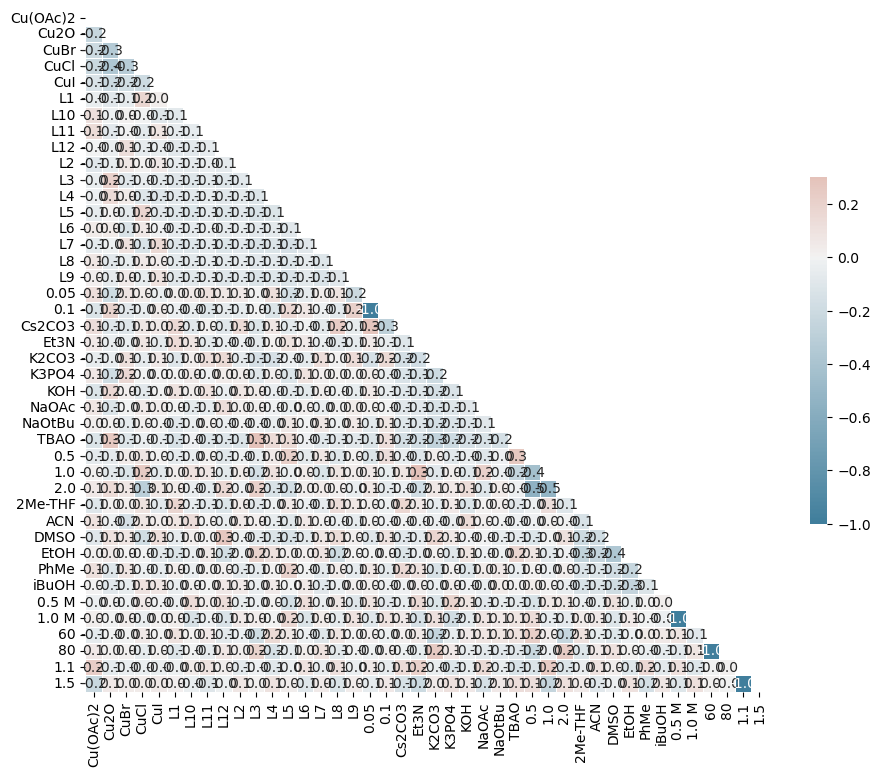

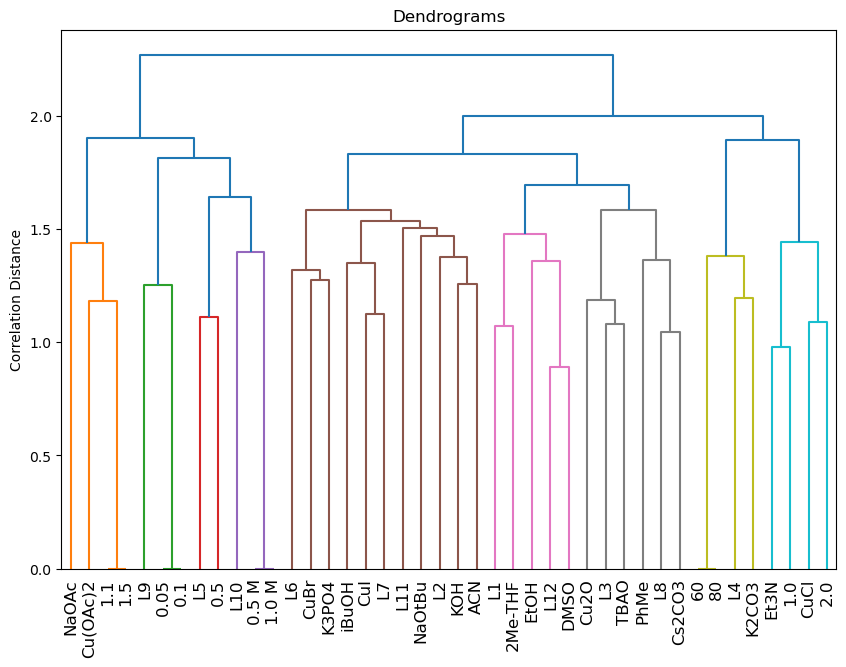

In [30]:
# Compute the correlation matrix
corr = x_train.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5},
annot=True, fmt=".1f")
correlation_matrix = x_train.corr()
correlation_matrix = np.corrcoef(correlation_matrix)
correlation_matrix = np.abs(correlation_matrix)
dist_matrix = 1 - correlation_matrix
import scipy.cluster.hierarchy as sch
clustering = sch.linkage(dist_matrix, method="complete")
#clustering = shap.utils.hclust(X_train, metric='correlation')
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = hierarchy.dendrogram(clustering, labels=x_train.columns)
# Rotate labels for better readability
plt.xticks(rotation=90)
# Increase label size for better visibility
plt.tick_params(axis='x', which='major', labelsize=12)
plt.ylabel('Correlation Distance')
plt.show()

Notice that although this clustering shows similarities to other ones we have seen previously, notably the expected pairings of complementary features (such as temperatures). Something new is the proximity of K3PO4 and CuBr which is a base/Cu source pair that tends to yield high results together.

[Text(0.6989349048442907, 0.9666666666666667, 'K2CO3 <= 0.5\nsquared_error = 451.309\nsamples = 137\nvalue = 19.577'),
 Text(0.5042711937716263, 0.9, 'DMSO <= 0.5\nsquared_error = 263.03\nsamples = 110\nvalue = 13.782'),
 Text(0.35283304498269896, 0.8333333333333334, '1.1 <= 0.5\nsquared_error = 189.369\nsamples = 90\nvalue = 11.119'),
 Text(0.21842560553633217, 0.7666666666666667, 'EtOH <= 0.5\nsquared_error = 258.709\nsamples = 49\nvalue = 15.579'),
 Text(0.14273356401384082, 0.7, 'L4 <= 0.5\nsquared_error = 119.948\nsamples = 25\nvalue = 10.801'),
 Text(0.0986159169550173, 0.6333333333333333, 'TBAO <= 0.5\nsquared_error = 86.07\nsamples = 22\nvalue = 9.0'),
 Text(0.06228373702422145, 0.5666666666666667, '60 <= 0.5\nsquared_error = 73.406\nsamples = 14\nvalue = 5.55'),
 Text(0.04844290657439446, 0.5, 'L5 <= 0.5\nsquared_error = 92.697\nsamples = 7\nvalue = 9.962'),
 Text(0.04152249134948097, 0.43333333333333335, 'iBuOH <= 0.5\nsquared_error = 32.454\nsamples = 6\nvalue = 7.675'),
 Te

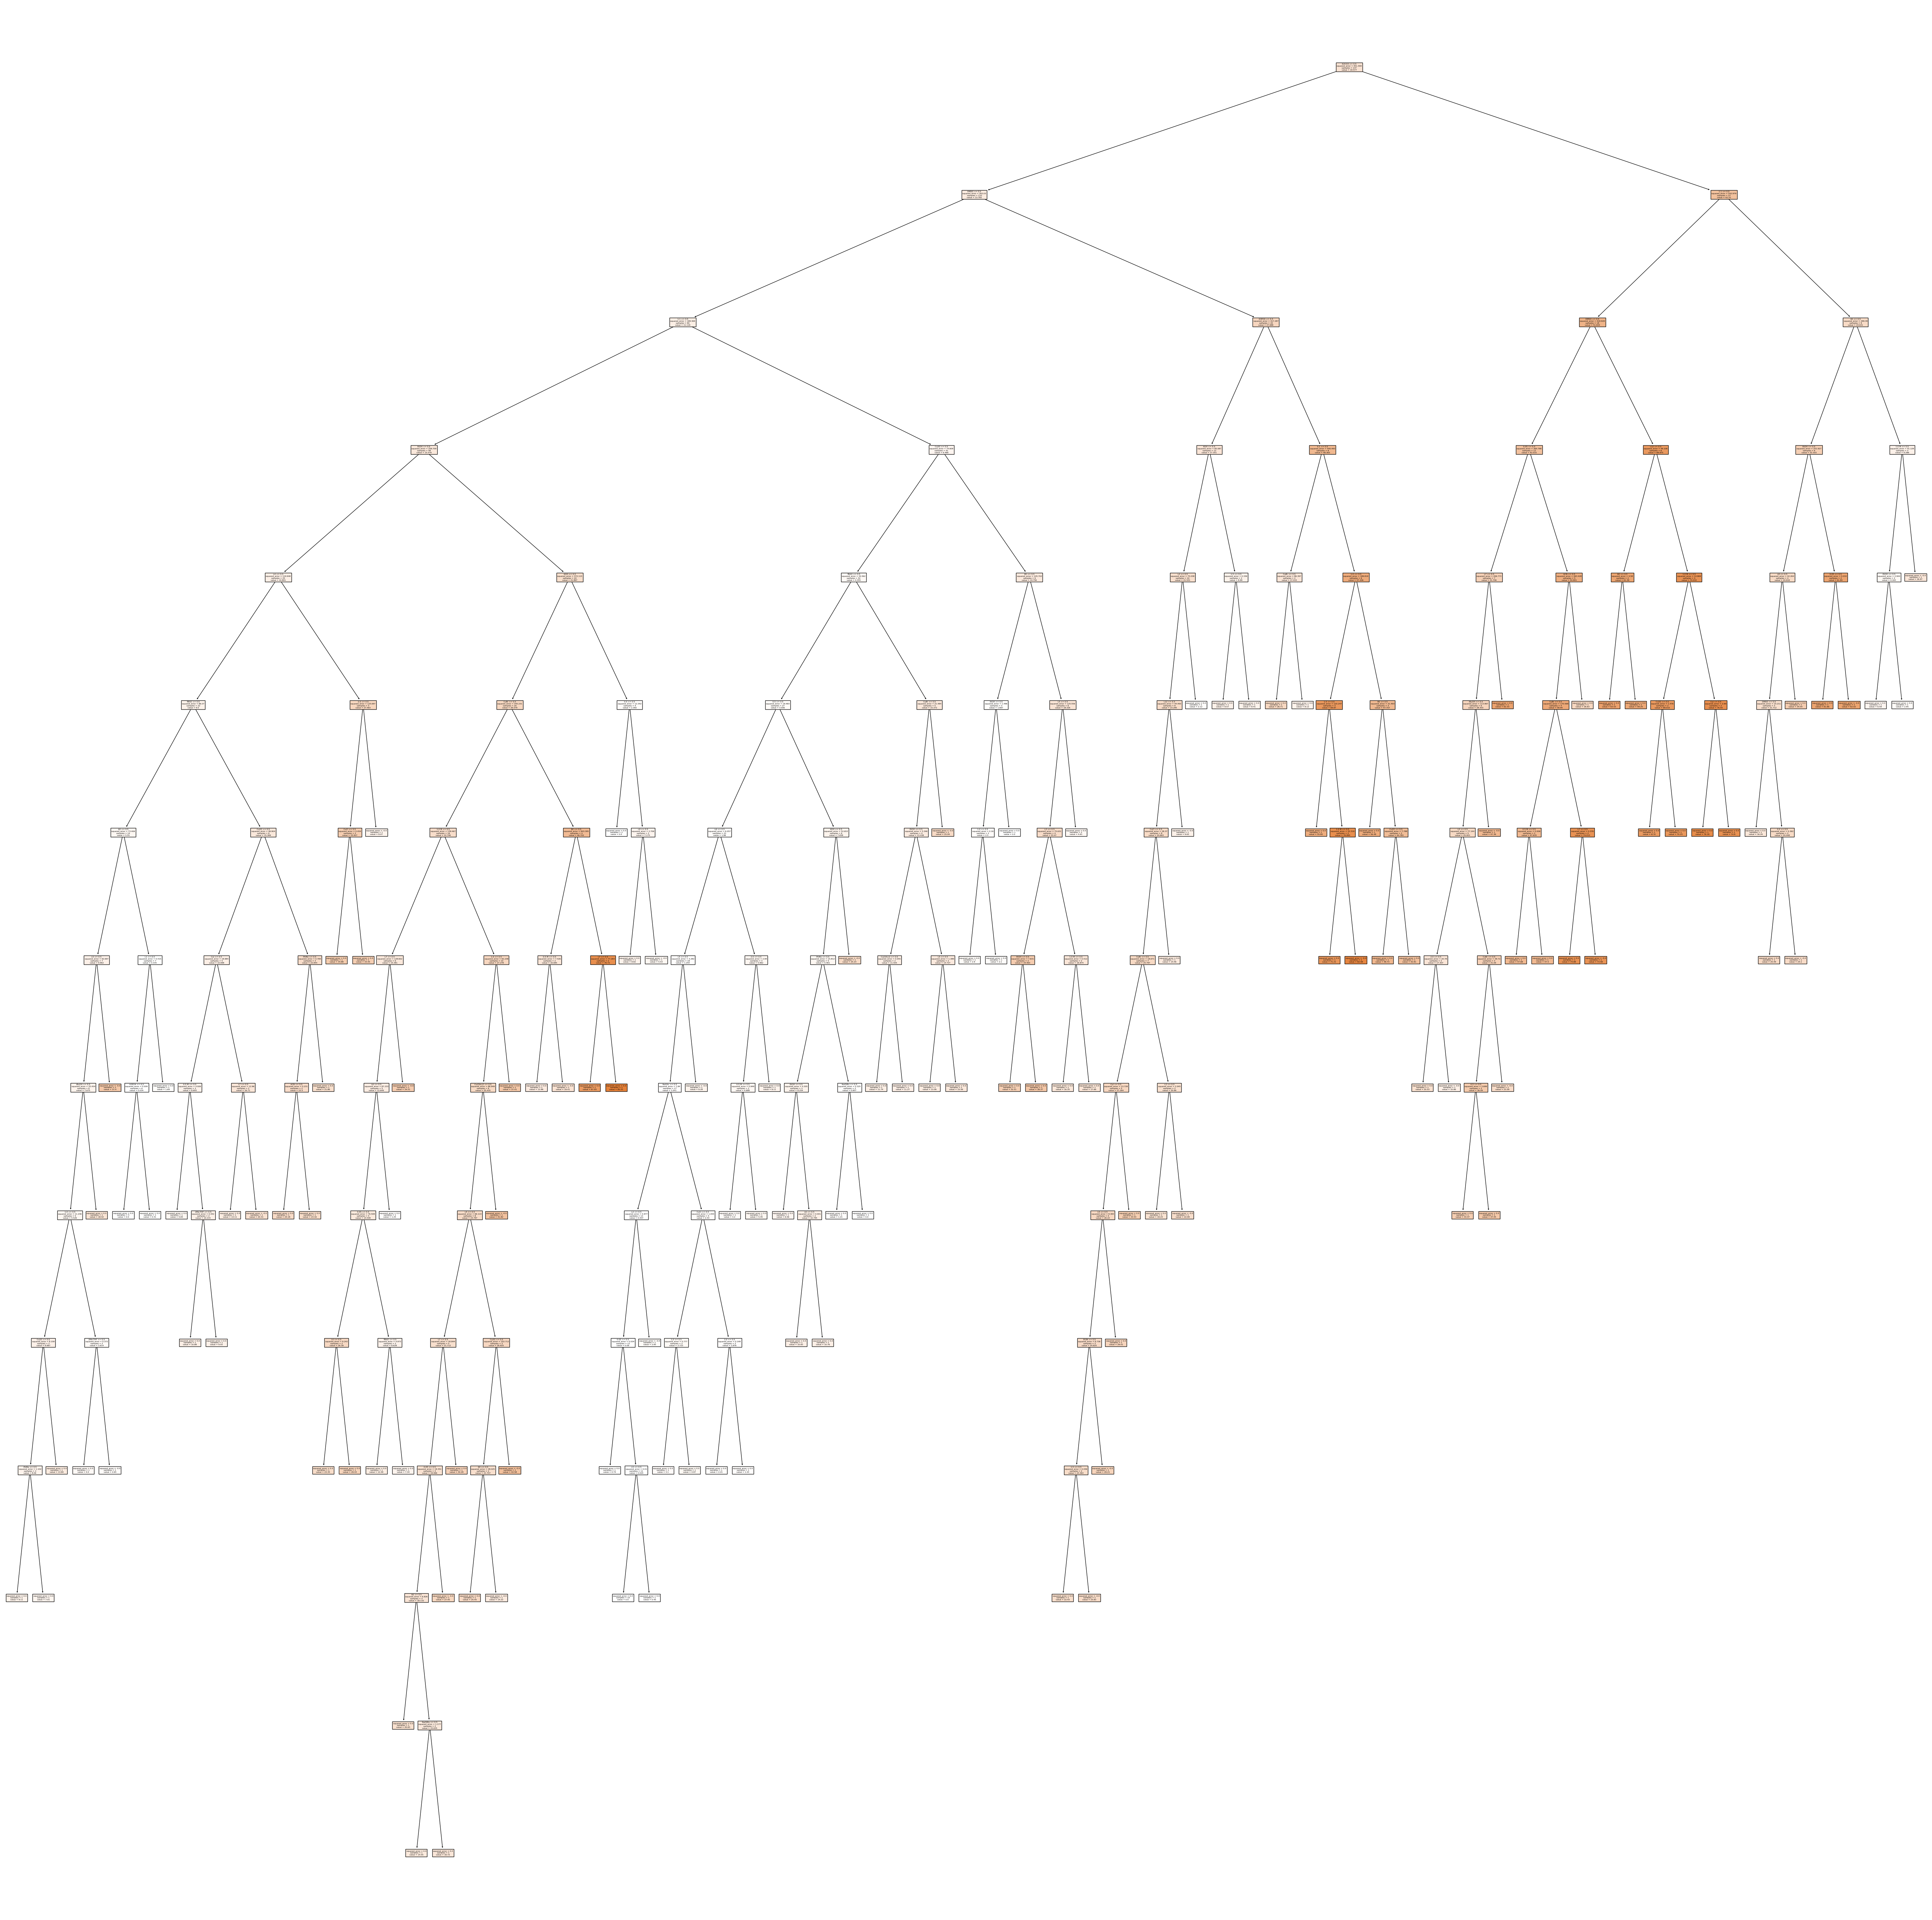

In [52]:
from sklearn import tree
plt.figure(figsize=(75,75))
tree.plot_tree(model.estimators_[0],feature_names=x_train.columns, filled=True)

The RandomForestRegressor constructs a number of decision trees at training time and outputs the mean prediction of the individual trees. It therefore falls under the category of meta estimators which are machine learning models combining the results of multiple predictions to give its answer. Note that all the trained trees run in **parallel** which means there is no interaction between them while they are built. 

This specific graph shows the first tree of our 'forest', so to speak. Let's look at one of the nodes in more detail. The information given to us is:
- the name of the feature and its value (in the case of OHE we have <=0.5 or >=0.5 at each node for a specific feature)
- squared error which is found between the yields of all the samples with the features at certain values indicated by the tree
- samples is the number of samples with this configuration of features and values
- value is the mean yield of the samples with this configuration of features and values

The squared error for every bottom node is 0 as it corresponds to one or more specific data points the tree has seen during training. 

The higher a feature is in the path, the bigger its importance is in the prediction the model makes: notice here that the first nodes are K2CO3, DMSO, 1.1 BnNH2 equivalent, TBAO...Mostly features we previously determined had high SHAP values. On the flipside, the further down a feature is in the path, the smaller is its impact on the prediction. 

Notice that a single path in the tree does not include every feature; this is normal as every possible combination is not present in the training set. However we can use this observation to stress the benefits of using a Random Forest instead of a singular tree: every tree will have different paths utilizing different features (this is not to say there won't be any similarities), therefore its output will differ depending on the features present or absent in the path corresponding to the input. Thus by averaging all the outputs we make sure to take into account even the influence of the 'weaker' features neglected by certain trees.